# Predicting Google Play Store App Ratings

**Objective :**

The objective of this project is to build a predictive model that estimates app

1. The objective of this project is to build a predictive model that estimates app ratings in the Google Play Store based on various app attributes such as category, number of reviews, size, installs, and pricing.


2. Understanding the factors that influence app ratings can help developers optimize their apps for higher customer satisfaction and improved visibility on the platform.

**Data Source:**

https://www.kaggle.com/datasets/muhammadarsalanakram/google-app-rating-prediction

**Dataset Description:**

1. App - Show the name of the app in play store

2. Category - Show the Category of the app

3. Rating - Show the rating that are given by the users

4. Reviews - Show the reviews of the app from the users

5. Size - Show the size of app in megabyte in the play store

6. Installs - Show the numbers of installs app in play store

7. Type - Show whether the app is paid or free in the play store

8. Price - Show the price of the app, if the user purchased or not

9. Content Rating - Show the rating of the content that's on the app by the users

10. Genres - Show the app genre in which what the app in it

11. LastUpdate - Show the last update date of the app

12. CurrentVer - Show the current version of the app

13. AndroidVer - show the android version of the app



In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

In [ ]:

df = pd.read_csv("/content/googleplaystore.csv")


In [ ]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0.0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000,Free,0.0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000,Free,0.0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0.0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000,Free,0.0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


Categorical columns - 8

 App, Category, Size, Type, Content Rating, Genres, Last Updated, Current Ver, Android Ver

 Numerical columns - 4

 Rating , Reviews , Installs ,    Price



**Data Cleaning and Preprocessing**

In [ ]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
df.duplicated().any()

True

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [ ]:
df=df.drop(['App','Last Updated','Current Ver','Android Ver'], axis=1)

In [ ]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity


In [ ]:
'''# Create a boxplot for each numerical feature to identify outliers
numerical_features = ['Rating', 'Reviews', 'Installs', 'Price', 'Size']
for feature in numerical_features:
  plt.figure(figsize=(3, 3))
  sns.boxplot(x=df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()'''

"# Create a boxplot for each numerical feature to identify outliers\nnumerical_features = ['Rating', 'Reviews', 'Installs', 'Price', 'Size']\nfor feature in numerical_features:\n  plt.figure(figsize=(3, 3))\n  sns.boxplot(x=df[feature])\n  plt.title(f'Boxplot of {feature}')\n  plt.show()"

In [ ]:
'''def handle_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df

# Apply the function to handle outliers in numerical features using IQR method
for feature in numerical_features:
  df = handle_outliers_iqr(df, feature)

# After handling outliers, re-plot the boxplots to see if the outliers are effectively removed
for feature in numerical_features:
  plt.figure(figsize=(3, 3))
  sns.boxplot(x=df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show() '''

"def handle_outliers_iqr(df, column):\n  Q1 = df[column].quantile(0.25)\n  Q3 = df[column].quantile(0.75)\n  IQR = Q3 - Q1\n  lower_bound = Q1 - 1.5 * IQR\n  upper_bound = Q3 + 1.5 * IQR\n  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]\n  return df\n\n# Apply the function to handle outliers in numerical features using IQR method\nfor feature in numerical_features:\n  df = handle_outliers_iqr(df, feature)\n\n# After handling outliers, re-plot the boxplots to see if the outliers are effectively removed\nfor feature in numerical_features:\n  plt.figure(figsize=(3, 3))\n  sns.boxplot(x=df[feature])\n  plt.title(f'Boxplot of {feature}')\n  plt.show() "

**INSIGTHS**

Distribution of app ratings

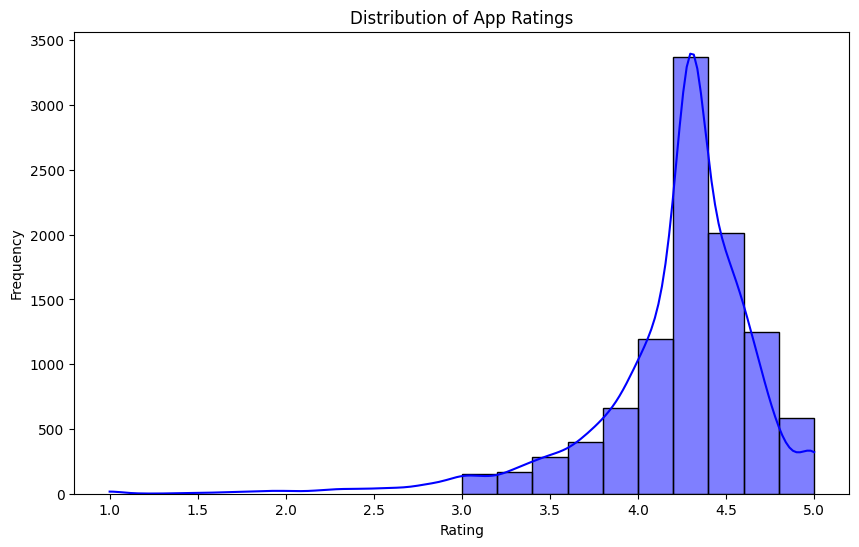

In [ ]:
# Plot the distribution of app ratings
def histogram():
    plt.figure(figsize=(10,6))
    sns.histplot(df['Rating'], bins=[3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0], kde=True, color='blue')
    plt.title('Distribution of App Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()
histogram()



*   The most common rating range is between 4.0 and 4.5, with a peak at around 4.25.
*   Fewer apps are rated below 3.5 or above 4.75.




Relationship between the number of reviews and app ratings

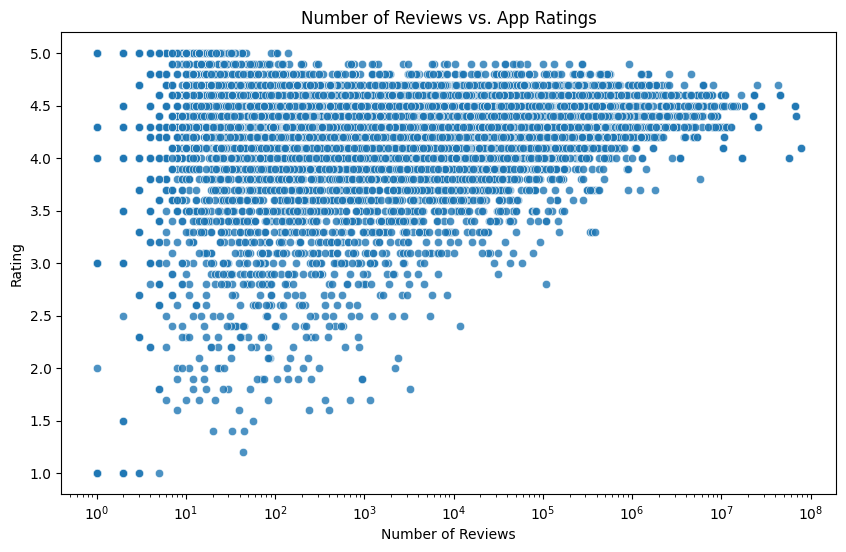

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(df,x='Reviews', y='Rating', alpha=0.8 )
plt.title('Number of Reviews vs. App Ratings')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.xscale('log')



*   Ratings tend to cluster around higher values (4.0 to 4.8), suggesting that most apps receive fairly positive ratings.



Distribution of free vs. paid apps

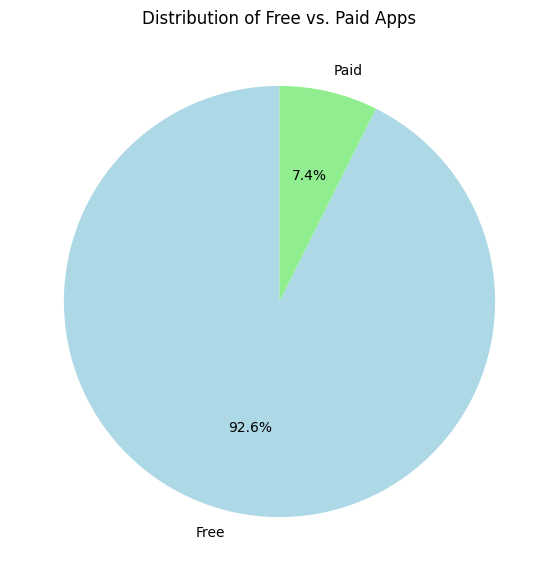

In [ ]:
# Count of free vs paid apps
free_vs_paid = df['Type'].value_counts()
plt.figure(figsize=(7,7))
free_vs_paid.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Free vs. Paid Apps')
plt.ylabel('')
plt.show()



*   92.6% of the apps are free, while only 7.4% are paid.
*   This indicates that the majority of apps available on the Google Play Store are free, suggesting that app developers might rely more on in-app purchases or ads for revenue rather than charging upfront for the app.



Genres have the highest number of installs

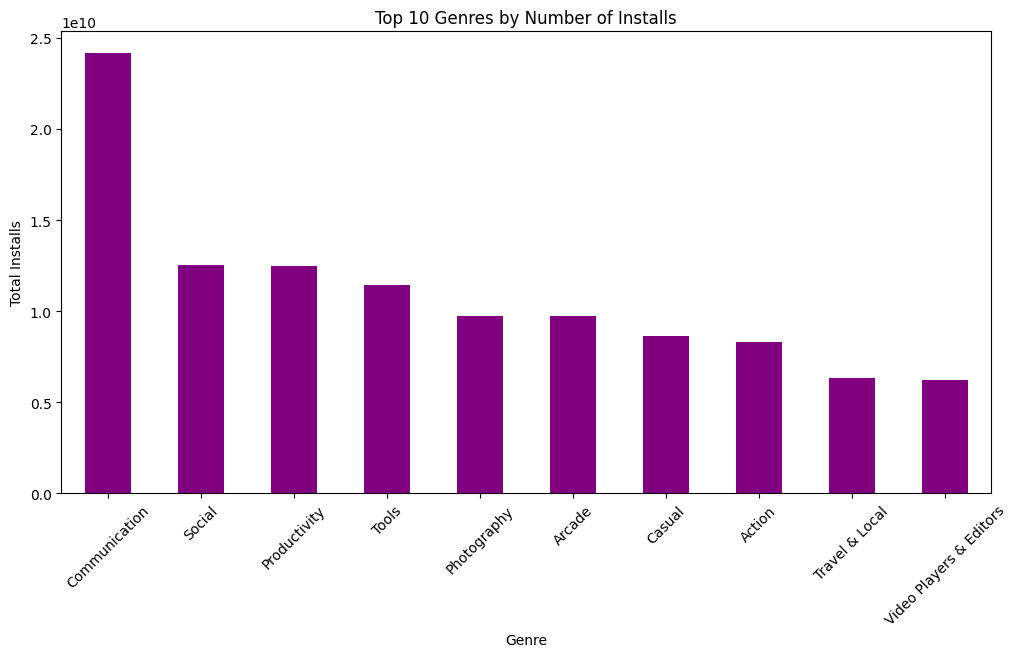

In [ ]:
genre_installs = df.groupby('Genres')['Installs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
genre_installs.plot(kind='bar', color='purple')
plt.title('Top 10 Genres by Number of Installs')
plt.xlabel('Genre')
plt.ylabel('Total Installs')
plt.xticks(rotation=45)
plt.show()



*   "Communication" apps have the highest number of installs, followed by "Social" and "Productivity" apps



** Price of paid apps vary across different categories**

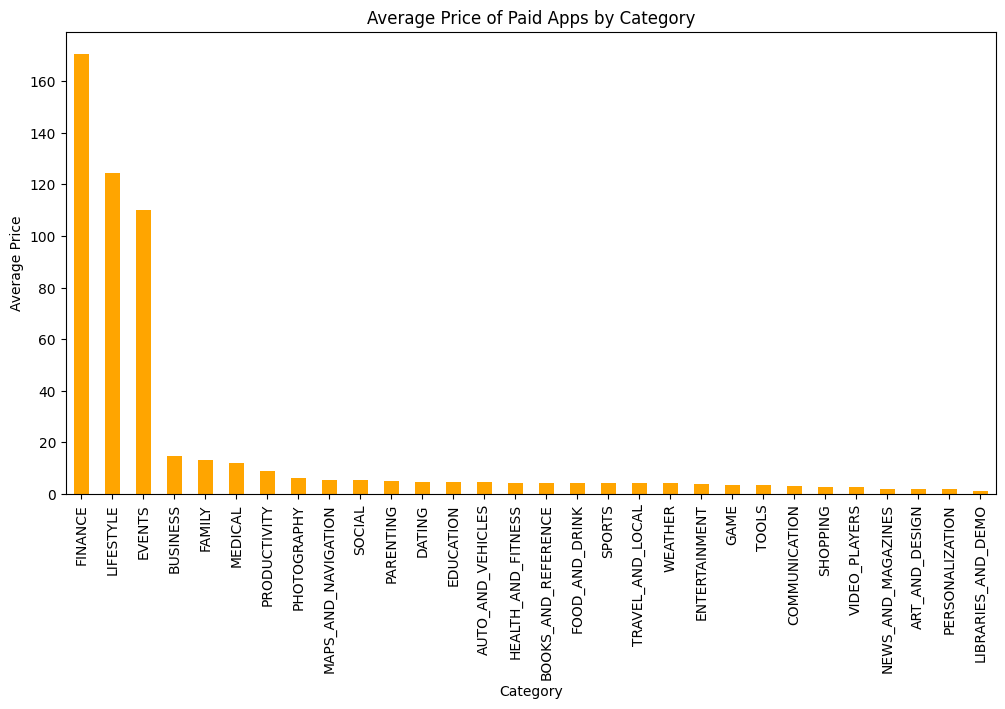

In [ ]:

# Filter for paid apps
paid_apps = df[df['Type'] == 'Paid']

# Group by Category and calculate the mean of Price
category_price = paid_apps.groupby('Category')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
category_price.plot(kind='bar', color='orange')
plt.title('Average Price of Paid Apps by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


 Categories like Finance, Lifestyle, and Business have the highest average prices, significantly more than other categories. Most categories have a much lower average price, indicating a few specific categories tend to have pricier apps compared to others.

**LabelEncoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in ['Category', 'Type', 'Content Rating', 'Genres']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [ ]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159,19M,10000,0,0.0,1,9
1,0,3.9,967,14M,500000,0,0.0,1,12
2,0,4.7,87510,8.7M,5000000,0,0.0,1,9
3,0,4.5,215644,25M,50000000,0,0.0,4,9
4,0,4.3,967,2.8M,100000,0,0.0,1,11


**Convert Size to numerical**

In [ ]:
def size_to_bytes(size):
    if size.endswith('M'):
        return float(size[:-1]) * 1_000_000  # Convert MB to bytes
    elif size.endswith('k'):
        return float(size[:-1]) * 1_000  # Convert KB to bytes
    elif size == 'Varies with device':
        return None
    else:
        return float(size)
df['Size'] = df['Size'].apply(size_to_bytes)

In [ ]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159,19000000.0,10000,0,0.0,1,9
1,0,3.9,967,14000000.0,500000,0,0.0,1,12
2,0,4.7,87510,8700000.0,5000000,0,0.0,1,9
3,0,4.5,215644,25000000.0,50000000,0,0.0,4,9
4,0,4.3,967,2800000.0,100000,0,0.0,1,11


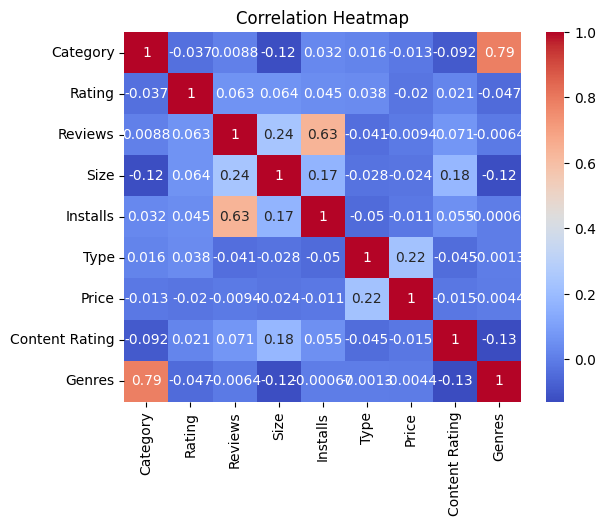

<Figure size 1800x1200 with 0 Axes>

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.figure(figsize=(18,12))
plt.show()



*  Reviews and Installs:

These have a strong positive correlation (0.63), which is intuitive since apps with more installs are likely to get more reviews.
*  Category and Genres:

These show a high correlation (0.79), which makes sense since they both represent the type of app, though in slightly different ways. You might consider keeping only one of these to avoid redundancy.

*   Size and Rating:

There’s a slight positive correlation between size and rating (0.064), but it’s quite weak, suggesting that app size might not be a strong predictor of rating.
*   Price and Rating:

The correlation between price and rating is very low (-0.02), indicating that price alone has little to no relationship with ratings in this dataset.




**Exploratory Data Analysis**

In [ ]:
df.describe()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
count,10357.000000,10357.000000,1.035700e+04,8.831000e+03,1.035700e+04,10357.000000,10357.000000,10357.000000,10357.000000
mean,16.745776,4.203737,4.059046e+05,2.128779e+07,1.415776e+07,0.073863,1.030800,1.455151,64.276045
std,8.358896,0.485594,2.696778e+06,2.254025e+07,8.023955e+07,0.261561,16.278625,1.000599,32.859084
min,0.000000,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,11.000000,4.100000,3.200000e+01,4.700000e+06,1.000000e+03,0.000000,0.000000,1.000000,38.000000
50%,14.000000,4.300000,1.680000e+03,1.300000e+07,1.000000e+05,0.000000,0.000000,1.000000,67.000000
75%,25.000000,4.500000,4.641600e+04,2.900000e+07,1.000000e+06,0.000000,0.000000,1.000000,96.000000
max,32.000000,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,1.000000,400.000000,5.000000,118.000000


**Data split**

In [ ]:
# Define X and y
X = df[['Reviews', 'Size', 'Installs', 'Type', 'Price', 'Category',
          'Content Rating', 'Genres']]
y = df['Rating']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in the target variable (Rating) for training
imputer = SimpleImputer(strategy='mean')

# Check if y_train is a NumPy array; if so, no need for .values
if isinstance(y_train, np.ndarray):
    y_train = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()
else:
    y_train = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

if isinstance(y_test, np.ndarray):
    y_test = imputer.transform(y_test.reshape(-1, 1)).ravel()
else:
    y_test = imputer.transform(y_test.values.reshape(-1, 1)).ravel()



In [ ]:
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
# Impute missing values in the feature set
imputer_features = SimpleImputer(strategy='mean')
X_train = imputer_features.fit_transform(X_train)
X_test = imputer_features.transform(X_test)

In [ ]:
# Scaling features for better performance with certain algorithms
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Data Model and Evaluation**

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42)
}

# Train each model and evaluate
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[model_name] = {"MAE": mae, "RMSE": rmse}

# Display results
results_df = pd.DataFrame(results).T
print("Model Comparison:")
print(results_df)

Model Comparison:
                              MAE      RMSE
Linear Regression        0.328769  0.495722
Random Forest Regressor  0.305413  0.476525
Decision Tree Regressor  0.386293  0.630752




*   Random Forest Regressor has the lowest MAE (0.3054) and RMSE (0.4765), indicating it outperforms the other models in predicting ratings more accurately.

*   Linear Regression also performs relatively well, though slightly worse than the Random Forest Regressor.


*   Decision Tree Regressor has the highest MAE and RMSE, indicating that it may be overfitting and isn't as robust for this dataset.


In [ ]:
def predict_rating(reviews, size, installs, app_type, price, category, content_rating, genres):
    # Preprocess the input data
    input_data = [[reviews, size, installs, app_type, price, category, content_rating, genres]]

    # Impute missing values and scale the input data
    input_data = imputer.transform(input_data)
    input_data = scaler.transform(input_data)

    # Make predictions with each model
    predictions = {}
    for model_name, model in models.items():
        y_pred = model.predict(input_data)[0]
        predictions[model_name] = y_pred

    return predictions


In [ ]:
reviews = 1000
size = 700000  # Example size in bytes
installs = 100000
app_type = 1 # 0 for free, 1 for paid
price = 0.0
category = 1  # Replace with actual encoded category
content_rating = 3  # Replace with actual encoded content rating
genres = 0  # Replace with actual encoded genres

predicted_ratings = predict_rating(reviews, size, installs, app_type, price, category, content_rating, genres)

print("Predicted Ratings:")
for model_name, rating in predicted_ratings.items():
    print(f"{model_name}: {rating}")

Predicted Ratings:
Linear Regression: 4.299445717513849
Random Forest Regressor: 3.7199999999999993
Decision Tree Regressor: 3.2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


**Module 3**

Push dataset into database

In [ ]:
import sqlite3
df = pd.read_csv('/content/googleplaystore.csv')
conn = sqlite3.connect('google_rating.db')
# Push the data into the database
df.to_sql('googleplaystore_data', conn, if_exists='replace', index=False)
conn.commit()
conn.close()
print("Data successfully inserted into the SQLite database.")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

try:
  img = mpimg.imread('/content/database screen shot.png'  )
  plt.figure(figsize=(10, 6))
  plt.imshow(img)
  plt.axis('off')
  plt.show()
except FileNotFoundError:
  print(f"Error: Image file not found at {'/content/database screen shot.png'  }")